**Credit-Card-Fraud-Detection-Using-Machine-Learning-Comparative-Study**
Author: Mohammed Kharma, Feb-2023


This book is using the dataset taken from:

[Credit Card Fraud on Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)



-------------------------------------------------------------------

In [104]:
#Importing the required libraries:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [105]:
#Read the dataset into DataFrame using pandas

credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

# New Section

In [106]:
# shape of the data
credit_card_data.shape

(284807, 31)

In [107]:
# legit and fraudulent transactions per class
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [108]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [109]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [110]:
# compare the values for both transactions so we can compare the generated sample from the legitmite df where it need to refelect relevint means
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [111]:
# #legit_test = legit.sample(n=2000)
# legit_test = legit.iloc[0:2001,0:32]
# legit = legit.iloc[2002:,0:32]

In [112]:
# from sklearn.utils import shuffle
# legit_sample = legit.sample(n=492)

In [113]:
# legit_sample.shape

In [114]:
# legit_test

Concatenate both dataFrames

In [115]:
new_dataset = pd.concat([legit, fraud], axis=0)

In [116]:
new_dataset.head()
new_dataset.tail()
new_dataset['Class'].value_counts()
new_dataset.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

Correlation of features using heatmap

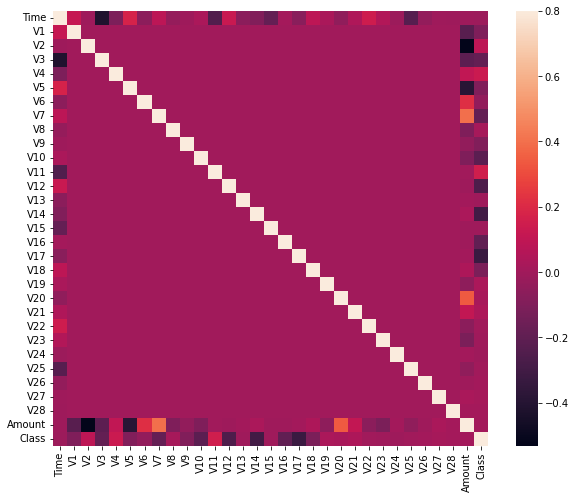

In [117]:
correlation_matrix = credit_card_data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [118]:
# distribution of features to compare both classes
import matplotlib.gridspec as gridspec
import seaborn as sns

if False:
  anomalous_features = credit_card_data.iloc[:,1:30].columns
  columns = 4
  rows = 5
  plt.figure(figsize=(5,30*4))
  gs = gridspec.GridSpec(30, 1)
  for i, cn in enumerate(credit_card_data[anomalous_features]):
      ax = plt.subplot(gs[i])
      sns.distplot(credit_card_data[cn][credit_card_data.Class == 1], bins=6)
      sns.distplot(credit_card_data[cn][credit_card_data.Class == 0], bins=6)
      ax.set_xlabel('')
      ax.set_title('Feature ' + str(cn) + ' histogram')
  plt.show()

Experement #1 &2

In [119]:
#10 runs 
from sklearn import ensemble

from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier  # Include
from sklearn.naive_bayes import GaussianNB   # Include
from sklearn.svm import SVC                      # Include
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


#model = LogisticRegression()     # Include
model = RandomForestClassifier(n_estimators=100)
#model = GaussianNB()
#model = SVC(kernel='linear', C=1.0)
#model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)

for i in range(1, 2):
  legit_new_sample = legit.sample(n=492)

  new_dataset = pd.concat([legit_new_sample, fraud], axis=0)

  # new_dataset = new_dataset[['V12' ,'V14' ,'V16','V17','V18','Class']]

  X_new = new_dataset.drop(columns='Class', axis=1)
  Y_new = new_dataset['Class']

  X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.2, stratify=Y_new, random_state=2)


  model.fit(X_train_new, Y_train_new)
  # accuracy on training data
  X_train_prediction_new = model.predict(X_train_new)
  # training_data_accuracy_new = accuracy_score(X_train_prediction_new, Y_train_new)

  #print('Accuracy on Training data : ', training_data_accuracy_new)

  # accuracy on test data
  X_test_prediction_new = model.predict(X_test_new)
  test_data_accuracy_new = accuracy_score(Y_test_new, X_test_prediction_new)

  print(classification_report(Y_test_new,X_test_prediction_new))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.86      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



Display the results

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       112
           1       0.86      0.99      0.92        85

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



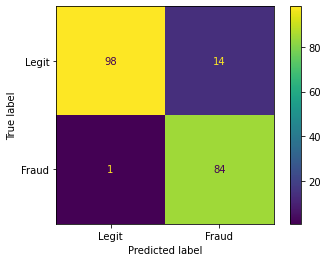

In [120]:
  from sklearn.metrics import classification_report
  print(classification_report(X_test_prediction_new,Y_test_new))

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y_test_new
predicted = X_test_prediction_new

confusion_matrix = metrics.confusion_matrix(predicted,actual)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Legit","Fraud"])

cm_display.plot()
plt.show()




Experement #3 - Oversampling

In [121]:
from sklearn import ensemble

from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier  # Include
from sklearn.naive_bayes import GaussianNB   # Include
from sklearn.svm import SVC                      # Include
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

model = LogisticRegression(C=1, penalty='l2')     # Include
# model = RandomForestClassifier(n_estimators=20)
#model = GaussianNB()
#model = SVC(kernel='linear', C=1.0)
#model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=10)

for i in range(1, 2):
  legit_new_sample = legit

  new_dataset = pd.concat([legit_new_sample, fraud], axis=0)

  # new_dataset = new_dataset[['V12' ,'V14' ,'V16','V17','V18','Class']]

  X_new = new_dataset.drop(columns='Class', axis=1)
  Y_new = new_dataset['Class']


  X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.2, stratify=Y_new, random_state=2)


  ros= RandomOverSampler(sampling_strategy='minority')
  X_train_new, Y_train_new=ros.fit_resample(X_train_new, Y_train_new)

  X_test_new, Y_test_new=ros.fit_resample(X_test_new, Y_test_new)


  # parameters = {
  #   "n_estimators":[5,50,250,500],
  #   "max_depth":[1,3,5,7,9],
  #   "learning_rate":[0.01,0.1,1,10,100]
  # }
  # from sklearn.model_selection import GridSearchCV
  # cv = GridSearchCV(model,parameters,cv=5)
  # cv.fit(X_train_new,Y_train_new.values.ravel())

  # logcls_os = GridSearchCV(, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1)
  # bestlogcls_os = logcls_os.fit(X_train_new, Y_train_new)
  # bestlogcls_os.estimator

  model.fit(X_train_new, Y_train_new)
  # accuracy on training data
  X_train_prediction_new = model.predict(X_train_new)
  # training_data_accuracy_new = accuracy_score(X_train_prediction_new, Y_train_new)

  #print('Accuracy on Training data : ', training_data_accuracy_new)

  # accuracy on test data
  X_test_prediction_new = model.predict(X_test_new)
  test_data_accuracy_new = accuracy_score(Y_test_new, X_test_prediction_new)

  print(classification_report(Y_test_new,X_test_prediction_new))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     56864
           1       0.96      0.93      0.95     56864

    accuracy                           0.95    113728
   macro avg       0.95      0.95      0.95    113728
weighted avg       0.95      0.95      0.95    113728



Show results

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     58799
           1       0.93      0.96      0.95     54929

    accuracy                           0.95    113728
   macro avg       0.95      0.95      0.95    113728
weighted avg       0.95      0.95      0.95    113728



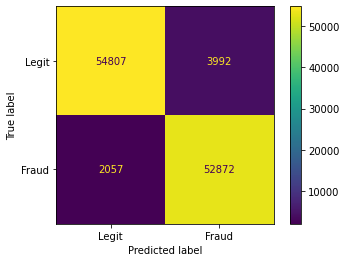

In [122]:
  from sklearn.metrics import classification_report
  print(classification_report(X_test_prediction_new,Y_test_new))

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y_test_new
predicted = X_test_prediction_new

confusion_matrix = metrics.confusion_matrix(predicted,actual)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Legit","Fraud"])

cm_display.plot()
plt.show()

SMOTE

In [123]:
from sklearn import ensemble

from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier  # Include
from sklearn.naive_bayes import GaussianNB   # Include
from sklearn.svm import SVC                      # Include
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

model = LogisticRegression()     # Include
# model = RandomForestClassifier(n_estimators=20)
#model = GaussianNB()
#model = SVC(kernel='linear', C=1.0)
# model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=10)

for i in range(1, 2):
  legit_new_sample = legit #.sample(n=492)

  new_dataset = pd.concat([legit_new_sample, fraud], axis=0)

  # new_dataset = new_dataset[['V1' ,'V3' ,'V4' ,'V7' ,'V10' ,'V11' ,'V12' ,'V14' ,'V16','V17','V18','Class']]

  X_new = new_dataset.drop(columns=['Class'], axis=1)
  Y_new = new_dataset['Class']

  X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.2, stratify=Y_new, random_state=2)

  from imblearn.over_sampling import SMOTE

  # ros= SMOTE
  # X_train_new, Y_train_new=ros.fit_resample(X_train_new, Y_train_new,y=)

  # X_test_new, Y_test_new=ros.fit_resample(X_test_new, Y_test_new)


  model.fit(X_train_new, Y_train_new)
  # accuracy on training data
  X_train_prediction_new = model.predict(X_train_new)
  # training_data_accuracy_new = accuracy_score(X_train_prediction_new, Y_train_new)

  #print('Accuracy on Training data : ', training_data_accuracy_new)

  # accuracy on test data
  X_test_prediction_new = model.predict(X_test_new)
  test_data_accuracy_new = accuracy_score(Y_test_new, X_test_prediction_new)

  print(classification_report(Y_test_new,X_test_prediction_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.64      0.70        98

    accuracy                           1.00     56962
   macro avg       0.88      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
